In [38]:
import time
import pandas as pd
from IPython.display import display_html
from matplotlib import pyplot as plt

## load image

In [39]:
import numpy as np
import os
import PIL
from PIL import Image, ImageOps
PIL.Image.MAX_IMAGE_PIXELS = 933120000

cached_img_load = {}

def get_files(name,path):
    if not os.path.isdir(path):
        return [(name,path)]
    else:
        targets = [
            f for f in os.listdir(path) if not os.path.isdir(os.path.join(path, f))
        ]
        return [
            (name + '/' + f, os.path.join(path, f)) for f in targets
        ]

def load_image(name,path):
    try:
        image = Image.open(path)
        # https://stackoverflow.com/questions/63947990/why-are-width-and-height-of-an-image-are-inverted-when-loading-using-pil-versus
        image = ImageOps.exif_transpose(image)

        img = np.array(image.convert('RGB'))
        dpi = image.info.get("dpi")

        print("name: ", name, 'dpi:', dpi)

        cached_img_load[name] = (img,dpi)
    except Exception as e:
        print("skip: ", path)

In [40]:
files = get_files("images", os.path.abspath("../images/projection-score"))
for n,f in files:
    load_image(n,f)

name:  images/sample1.jpg dpi: None
name:  images/sample2.jpg dpi: None
name:  images/skewed_text.jpg dpi: (96, 96)


## preprocess image

name:  images/sample1.jpg time:  0.000992 seconds
name:  images/sample2.jpg time:  0.000992 seconds
name:  images/skewed_text.jpg time:  0.000000 seconds


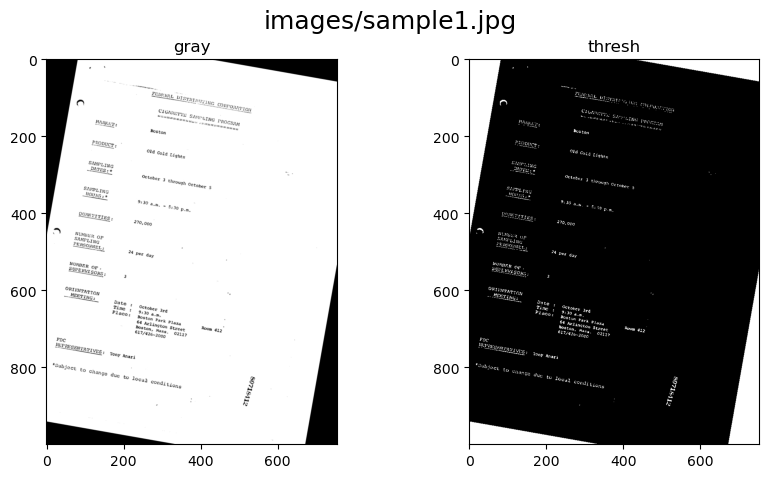

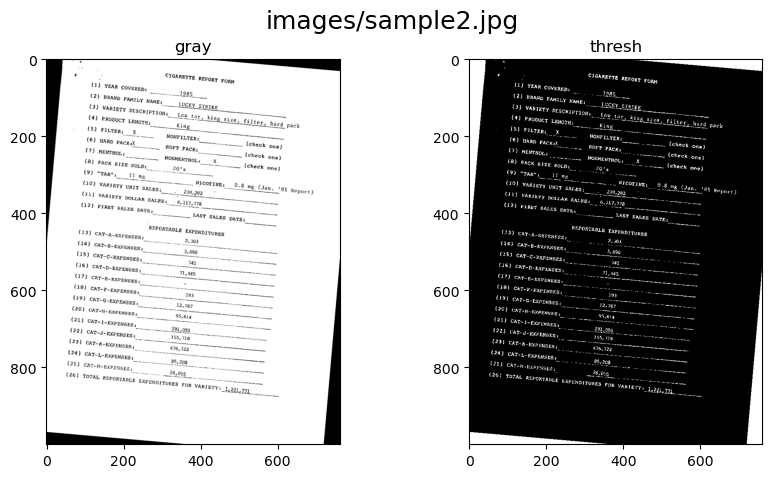

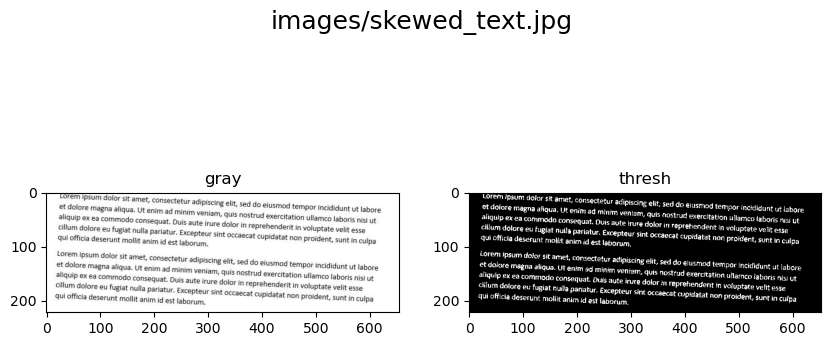

In [41]:
import cv2

cached_img_preprocess = {}

for name,(img,_) in cached_img_load.items():
    start = time.time()

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # invert black
    thresh = cv2.threshold(
        gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    end = time.time()
    cached_img_preprocess[name] = thresh


    print("name: ", name, "time: ", "{:.6f} seconds".format(end - start))

    # show the output image
    show_imgs = [
        ("gray", gray),
        ("thresh", thresh)
    ]
    show_count = len(show_imgs)
    fig = plt.figure(figsize=(show_count * 5,5))
    fig.suptitle(name, fontsize=18)
    gs = fig.add_gridspec(1,show_count)
    for idx, (name,img) in enumerate(show_imgs):
        if img is None: continue
        ax = fig.add_subplot(gs[0, idx])
        ax.set_title(name)
        ax.imshow(img, cmap='gray')

## projection angle

C:\Users\xy\AppData\Local\Temp\ipykernel_14504\882563325.py:31: UserWarning: Glyph 35282 (\N{CJK UNIFIED IDEOGRAPH-89D2}) missing from current font.
  plt.tight_layout()
C:\Users\xy\AppData\Local\Temp\ipykernel_14504\882563325.py:31: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  plt.tight_layout()
C:\Users\xy\AppData\Local\Temp\ipykernel_14504\882563325.py:31: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.tight_layout()
C:\Users\xy\AppData\Local\Temp\ipykernel_14504\882563325.py:31: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from current font.
  plt.tight_layout()
C:\Users\xy\AppData\Local\Temp\ipykernel_14504\882563325.py:31: UserWarning: Glyph 32032 (\N{CJK UNIFIED IDEOGRAPH-7D20}) missing from current font.
  plt.tight_layout()
C:\Users\xy\AppData\Local\Temp\ipykernel_14504\882563325.py:31: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
 

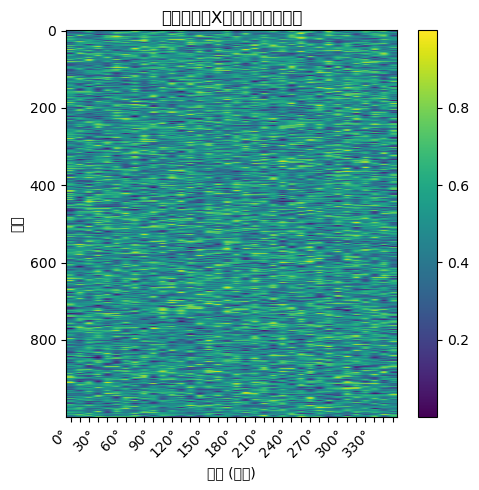

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# 示例数据
image_data = np.random.rand(1000, 36)
angles = np.linspace(0, 350, 36)  # 示例角度数组，从0到350度，共36个点

# 创建一个新的图形和轴
fig, ax = plt.subplots(figsize=(5, 5))

# 使用 ax.imshow 绘制图像
im = ax.imshow(image_data, aspect='auto', cmap='viridis')

# 设置 x 轴刻度的位置
ax.set_xticks(np.arange(len(angles)))

# 设置 x 轴刻度标签为 angles 数组中的值
visible_labels = [f'{angle:.0f}°' if i % 3 == 0 else '' for i, angle in enumerate(angles)]
ax.set_xticklabels(visible_labels, rotation=45, ha='right')  # 旋转标签并调整对齐方式


# 添加标题和 x、y 轴标签
ax.set_title('图像显示及X轴刻度转换为角度')
ax.set_xlabel('角度 (度数)')
ax.set_ylabel('像素')

# 添加颜色条
fig.colorbar(im, ax=ax, orientation='vertical')

# 显示图表
plt.tight_layout()
plt.show()


name:  images/sample1.jpg time: 0.040003 seconds


,angles,counts,classified
0,0,990,normal
1,5,1000,normal
2,10,688,normal
3,15,589,best
4,20,744,normal
5,25,801,normal
6,30,843,normal
7,35,908,normal
8,40,970,normal
9,45,985,normal


name:  images/sample2.jpg time: 0.040547 seconds


,angles,counts,classified
0,0,1000,normal
1,5,863,normal
2,10,824,normal
3,15,862,normal
4,20,918,normal
5,25,956,normal
6,30,994,normal
7,35,1000,normal
8,40,1000,normal
9,45,1000,normal


name:  images/skewed_text.jpg time: 0.015310 seconds


,angles,counts,classified
0,0,199,best
1,5,219,normal
2,10,222,normal
3,15,222,normal
4,20,222,normal
5,25,222,normal
6,30,222,normal
7,35,222,normal
8,40,222,normal
9,45,222,normal


,angle
images/sample1.jpg,10.5
images/sample2.jpg,94.9
images/skewed_text.jpg,2.6


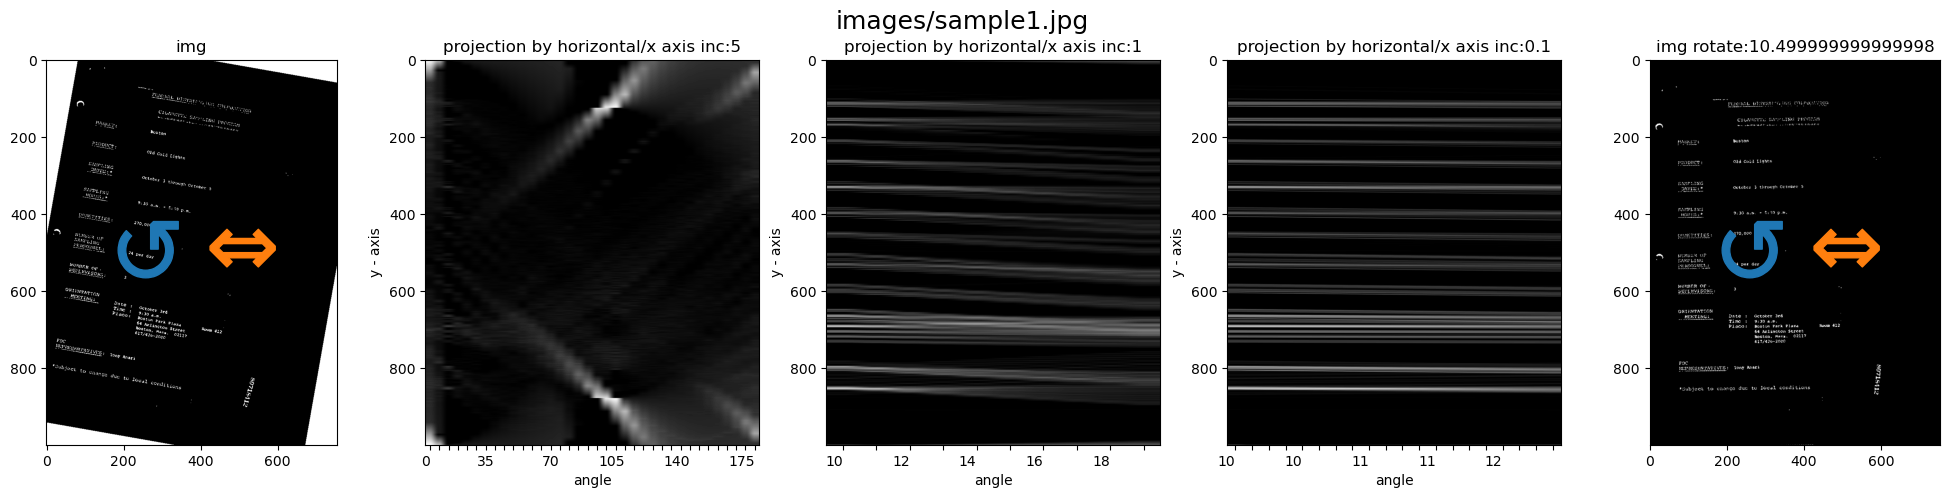

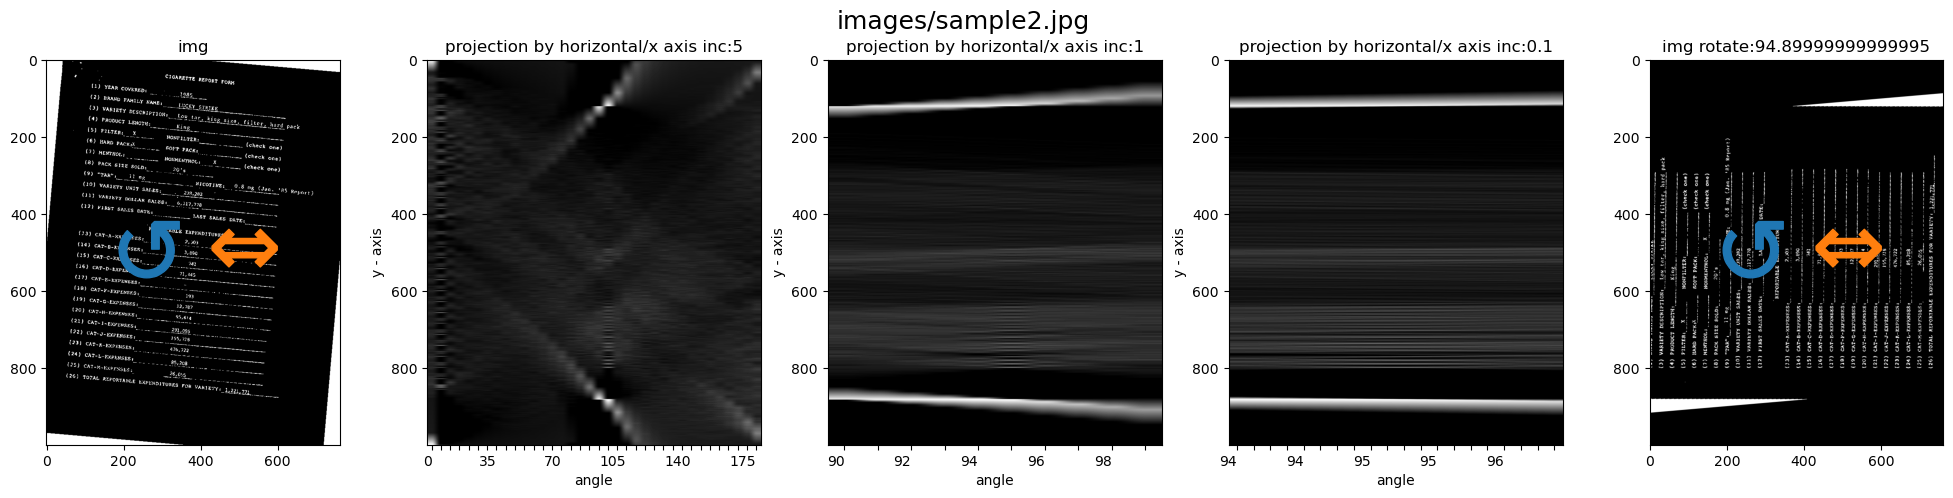

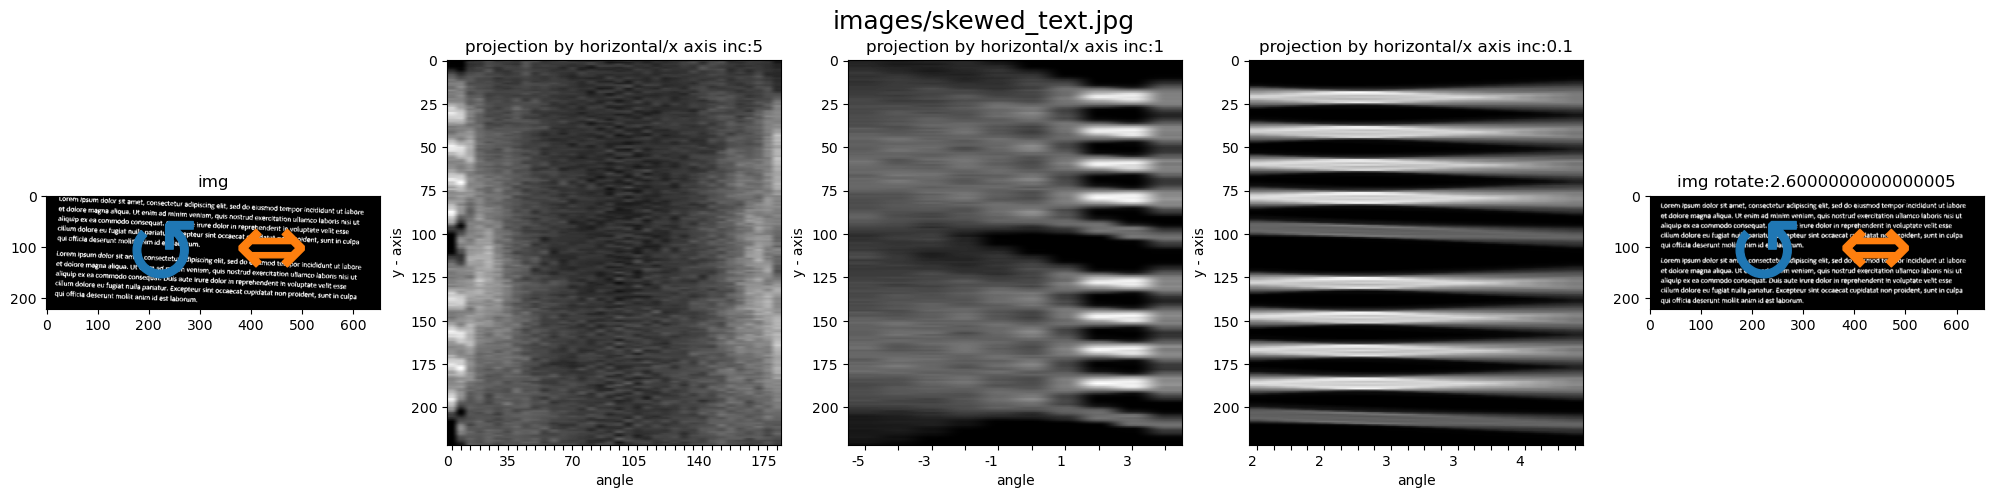

In [43]:
def rotate(img, angle):
    rows, cols = img.shape
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    dst = cv2.warpAffine(img, M, (cols, rows))
    return dst

def projection(img, vert, start_angle, end_angle, incr=0.5):
    length = img.shape[0]
    axis = 1
    if vert:
        axis = 0
        length = img.shape[1]

    angles = np.arange(start_angle, end_angle, incr)

    spaces = np.zeros((len(angles), length))
    for idx,deg in enumerate(angles):
        img_rotated = rotate(img, deg)
        axis_sums = np.sum(img_rotated, axis=axis)
        spaces[idx] = axis_sums

    return spaces,angles

def best(spaces, angles):
    min_score = spaces.shape[1]

    for idx,angle in enumerate(angles):
        axis_sums = spaces[idx]

        score = np.count_nonzero(axis_sums)
        if score < min_score:
            min_score = score
            best_angle = idx
    
    return best_angle

cached_projection_angle = {}

for name,img in cached_img_preprocess.items():
    start = time.time()

    vert = False
    start_angle = 0
    end_angle = 180

    step_results = []

    incr_steps = [5, 1, 0.1]
    for inc in incr_steps:
        spaces, angles = projection(img, vert, start_angle, end_angle, incr=inc)
        
        idx = best(spaces, angles)

        step_results.append((inc, spaces, angles, idx))

        best_angle = angles[idx]
        # next step angle
        start_angle = best_angle - inc
        end_angle = best_angle + inc

    end = time.time()
    cached_projection_angle[name] = (best_angle)


    print("name: ", name, "time:", "{:.6f} seconds".format(end - start))

    html = ''
    for step in step_results:
        (inc, spaces, angles, idx) = step
        counts = np.count_nonzero(spaces, axis=1)
        classified = np.full(len(angles), 'normal', dtype=object)
        classified[idx] = 'best'
        df = pd.DataFrame.from_dict({
            'angles': angles,
            'counts': counts,
            'classified': classified
        })
        df_styler = df.style.set_table_attributes("style='display:inline'").set_caption(f"incr by {inc}")
        html = html + df_styler._repr_html_()
    display_html(html, raw=True)

    row_count = 1
    col_count = len(step_results) + 2

    fig = plt.figure(figsize=(col_count * 5, row_count * 5))
    fig.suptitle(name, fontsize=18)
    gs = fig.add_gridspec(row_count,col_count)

    ax = fig.add_subplot(gs[0,0])
    ax.set_title(f"img")
    ax.imshow(img, cmap="gray")
    ax.plot(img.shape[1] * 1/3, img.shape[0] / 2, marker=r'$\circlearrowleft$', ms=50)
    ax.plot(img.shape[1] * 2/3, img.shape[0] / 2, marker=r'$\Leftrightarrow$', ms=50)

    for step_idx, step in enumerate(step_results):
        (inc, spaces, angles, idx) = step

        ax = fig.add_subplot(gs[0,step_idx + 1])
        ax.set_title(f"projection by horizontal/x axis inc:{inc}")
        ax.set_ylabel("y - axis")
        ax.set_xlabel("angle")
        ax.imshow(spaces.T, cmap="gray", aspect='auto')

        ax.set_xticks(np.arange(len(angles)))
        visible_count = len(angles) // 5
        visible_labels = [f'{angle:.0f}' if i % visible_count == 0 else '' for i, angle in enumerate(angles)]
        ax.set_xticklabels(visible_labels, ha='right')

    ax = fig.add_subplot(gs[0,col_count - 1])
    ax.set_title(f"img rotate:{best_angle}")
    ax.imshow(rotate(img,best_angle), cmap="gray")
    ax.plot(img.shape[1] * 1/3, img.shape[0] / 2, marker=r'$\circlearrowleft$', ms=50)
    ax.plot(img.shape[1] * 2/3, img.shape[0] / 2, marker=r'$\Leftrightarrow$', ms=50)


df = pd.DataFrame.from_dict(cached_projection_angle, orient='index', columns=['angle'])
display(df)

## deskew image

name:  images/sample1.jpg time:  0.001000 seconds
name:  images/sample2.jpg time:  0.001000 seconds
name:  images/skewed_text.jpg time:  0.000997 seconds


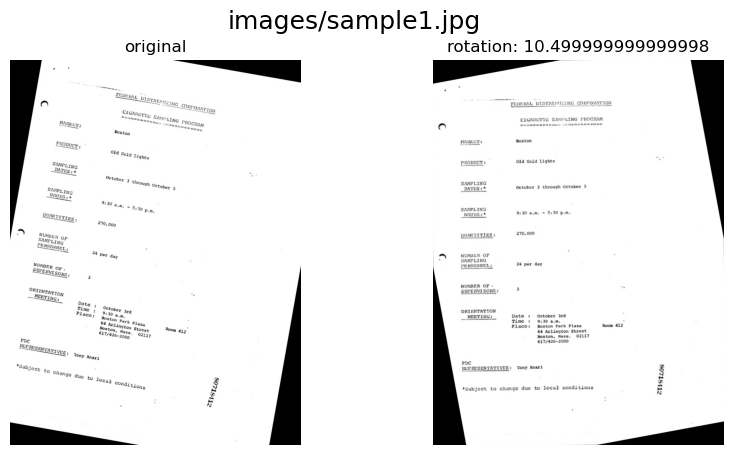

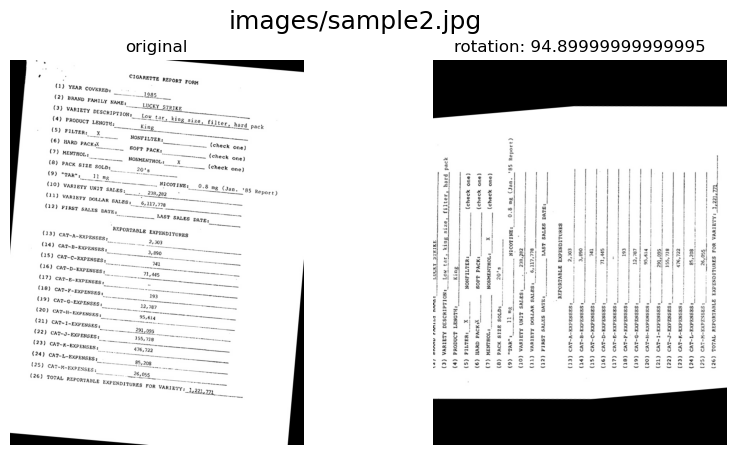

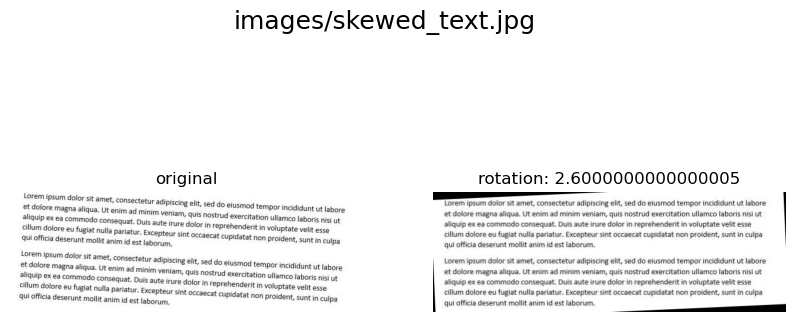

In [45]:
for name,(angle_deg) in cached_projection_angle.items():
    start = time.time()

    img,_ = cached_img_load[name]
    rotation_deg = angle_deg

    # Rotate original image
    img_center = tuple(np.array(img.shape[1::-1]) / 2)
    rotation_matrix = cv2.getRotationMatrix2D(img_center, rotation_deg, 1.0)
    img_rotated = cv2.warpAffine(img, rotation_matrix, img.shape[1::-1], flags=cv2.INTER_LINEAR)

    end = time.time()


    print("name: ", name, "time: ", "{:.6f} seconds".format(end - start))

    # show the output image
    imgs_show = [
        ("original", img),
        (f"rotation: {rotation_deg}", img_rotated)
    ]
    fig = plt.figure(figsize=(10,5))
    fig.suptitle(name, fontsize=18)
    gs = fig.add_gridspec(1,len(imgs_show))
    for idx, (name,img) in enumerate(imgs_show):
        ax = fig.add_subplot(gs[0, idx])
        ax.set_title(name)
        ax.axis('off')
        ax.imshow(img)
